<a href="https://colab.research.google.com/github/aayush1036/ml_course/blob/main/polynomial_regression/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression() #creating an instance of LinearRegression()
lin_reg.fit(X,y) #creating a line to fit our data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) #fitting a 4th degree polymial to our dataset
X_poly = poly_reg.fit_transform(X) #fitting the data according to the specified polynomial
lin_reg2 = LinearRegression() #creating an instance of LinearRegression()
lin_reg2.fit(X_poly,y) #creating a line to fit our data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Truth or bluff')

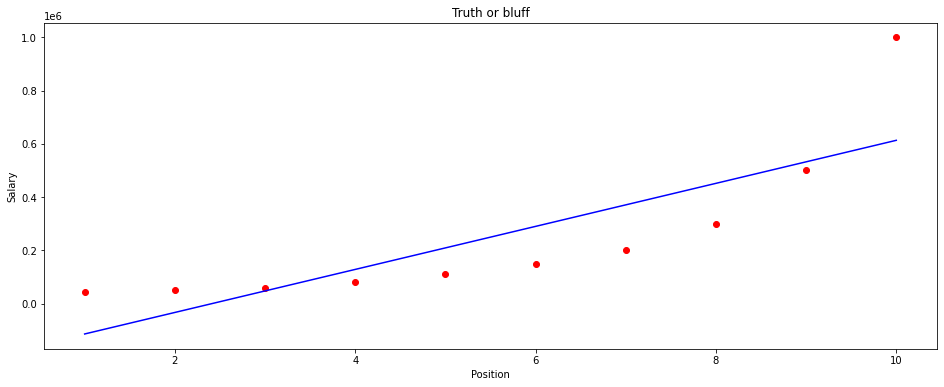

In [9]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(X, lin_reg.predict(X), color='blue')
ax.scatter(X, y, color='red')
ax.set_xlabel('Position')
ax.set_ylabel('Salary')
ax.set_title('Truth or bluff')

Text(0.5, 1.0, 'Truth or bluff (polynomial regression)')

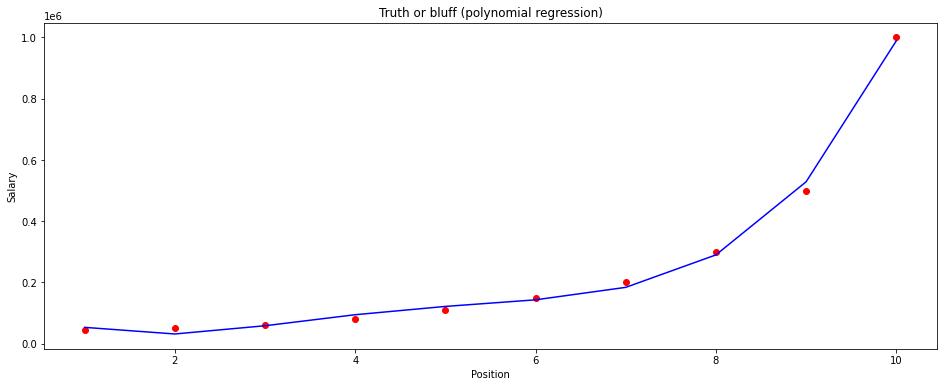

In [11]:
fig, ax = plt.subplots(figsize=(16,6))
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue') 
#doing polynomial regression... hence lin_reg2 (our linear regression object created for polynomial regression)
# we fit the data points according to polynomial regression and then pass it to predict function of lin_reg2
ax.scatter(X, y, color='red') #plotting original data points
ax.set_xlabel('Position')
ax.set_ylabel('Salary')
ax.set_title('Truth or bluff (polynomial regression)')

Text(0, 0.5, 'Salary')

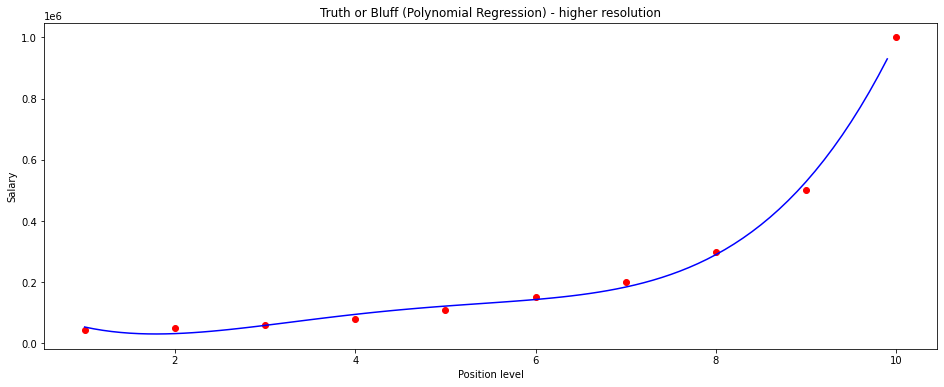

In [14]:
X_grid = np.arange(min(X), max(X), 0.1) #creating more dtaa points
X_grid = X_grid.reshape((len(X_grid), 1)) #transforming them into column vector (n rows and 1 col)
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(X,y,color='red') #plotting original data points 
ax.plot(X_grid, lin_reg2.predict(poly_reg.fit_transform(X_grid)), color='blue')
#doing polynomial regression... hence lin_reg2 (our linear regression object created for polynomial regression)
# we fit the data points according to polynomial regression and then pass it to predict function of lin_reg2
#but this time we are doing all this for more number of data points 
ax.set_title('Truth or Bluff (Polynomial Regression) - higher resolution')
ax.set_xlabel('Position level')
ax.set_ylabel('Salary')

In [17]:
lin_reg.predict([[6.5]]) #passing the concerned point as n dimensional array

array([330378.78787879])

In [19]:
lin_reg2.predict(poly_reg.fit_transform([[6.5]])) #transforming the point and fitting it according to polynomial regression and then performing the prediction on it

array([158862.45265155])

We see that for level 6, the salary is 150000 so for 6.5 salary should be little higher than 150000 but we see that linear regression predicts it as 330378 which is less accurate and the polynomial regression predicts it as 158862 which is more accurate

In [21]:
coef1, coef2, coef3, coef4, coef5 = lin_reg2.coef_

In [27]:
print(f'Polynomial {coef1}x^4 {coef2}x^3 + {coef3}x^2 {coef4}x + {coef5}')

Polynomial 0.0x^4 -211002.33100291883x^3 + 94765.44289063037x^2 -15463.28671330972x + 890.15151515248
